In [2]:
import os
import shutil
from tqdm import tqdm
from torchvision import transforms
from PIL import Image
import torch

def create_directory_structure(input_dir, output_dir):
    """Create the same directory structure as the input directory"""
    for root, dirs, _ in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        if relative_path != '.':
            os.makedirs(os.path.join(output_dir, relative_path), exist_ok=True)

def get_preprocessing_transform():
    """Define the preprocessing pipeline"""
    return transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),  # Convert to tensor
        transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize
    ])

def process_dataset(input_dir, output_dir, transform):
    """Process all images in the dataset while maintaining directory structure"""
    
    # First, create the directory structure
    create_directory_structure(input_dir, output_dir)
    
    # Process each directory
    for root, dirs, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        output_path = os.path.join(output_dir, relative_path)
        
        # Process images in current directory
        if files:
            for img_file in tqdm(files, desc=f"Processing {relative_path}"):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    input_path = os.path.join(root, img_file)
                    output_path = os.path.join(output_dir, relative_path, img_file)
                    
                    try:
                        # Open and preprocess image
                        img = Image.open(input_path).convert('L')
                        img = transform(img)
                        
                        # Convert tensor back to PIL image
                        img = transforms.ToPILImage()(img)
                        
                        # Save preprocessed image
                        img.save(output_path)
                        
                    except Exception as e:
                        print(f"Error processing {input_path}: {str(e)}")

def main():
    # Set dataset paths
    dataset_paths = {
        'train': r"C:\eye\OCT2017\train",
        'test': r"C:\eye\OCT2017\test",
        'val': r"C:\eye\OCT2017\val"  # If you have a validation set
    }
    
    output_base = r"C:\eye\Preprocessed1"
    
    # Delete existing preprocessed folder if it exists
    if os.path.exists(output_base):
        print("Removing existing preprocessed directory...")
        shutil.rmtree(output_base)
    
    # Create output base directory
    os.makedirs(output_base, exist_ok=True)
    
    # Get preprocessing transform
    transform = get_preprocessing_transform()
    
    # Process each dataset split
    for split, input_path in dataset_paths.items():
        if os.path.exists(input_path):
            print(f"\nProcessing {split} set...")
            output_path = os.path.join(output_base, split)
            process_dataset(input_path, output_path, transform)
    
    print(f"\nPreprocessing complete! Preprocessed data saved at: {output_base}")

if __name__ == "__main__":
    main()


Processing train set...


Processing NORMAL: 100%|██████████| 26315/26315 [03:35<00:00, 122.21it/s]



Processing test set...


Processing NORMAL: 100%|██████████| 242/242 [00:03<00:00, 61.76it/s]



Processing val set...


Processing NORMAL: 100%|██████████| 8/8 [00:00<00:00, 71.68it/s]


Preprocessing complete! Preprocessed data saved at: C:\eye\Preprocessed1


Epoch 1/10: 100%|██████████| 2609/2609 [1:35:29<00:00,  2.20s/it]


Epoch [1/10]
Train Loss: 0.5293, Train Acc: 80.75%
Val Loss: 0.1587, Val Acc: 96.88%
------------------------------------------------------------


Epoch 2/10: 100%|██████████| 2609/2609 [1:15:26<00:00,  1.73s/it]


Epoch [2/10]
Train Loss: 0.2672, Train Acc: 90.90%
Val Loss: 0.1369, Val Acc: 96.88%
------------------------------------------------------------


Epoch 3/10: 100%|██████████| 2609/2609 [1:15:35<00:00,  1.74s/it]


Epoch [3/10]
Train Loss: 0.1754, Train Acc: 94.14%
Val Loss: 0.0348, Val Acc: 100.00%
------------------------------------------------------------


Epoch 4/10: 100%|██████████| 2609/2609 [1:14:40<00:00,  1.72s/it]


Epoch [4/10]
Train Loss: 0.1168, Train Acc: 95.98%
Val Loss: 0.0563, Val Acc: 96.88%
------------------------------------------------------------


Epoch 5/10: 100%|██████████| 2609/2609 [1:14:25<00:00,  1.71s/it]


Epoch [5/10]
Train Loss: 0.0915, Train Acc: 97.08%
Val Loss: 0.0168, Val Acc: 100.00%
------------------------------------------------------------


Epoch 6/10: 100%|██████████| 2609/2609 [1:18:20<00:00,  1.80s/it]


Epoch [6/10]
Train Loss: 0.0722, Train Acc: 97.73%
Val Loss: 0.0145, Val Acc: 100.00%
------------------------------------------------------------


Epoch 7/10: 100%|██████████| 2609/2609 [1:14:07<00:00,  1.70s/it]


Epoch [7/10]
Train Loss: 0.0658, Train Acc: 98.04%
Val Loss: 0.0096, Val Acc: 100.00%
------------------------------------------------------------


Epoch 8/10: 100%|██████████| 2609/2609 [1:20:03<00:00,  1.84s/it]


Epoch [8/10]
Train Loss: 0.0589, Train Acc: 98.25%
Val Loss: 0.0109, Val Acc: 100.00%
------------------------------------------------------------


Epoch 9/10: 100%|██████████| 2609/2609 [1:20:36<00:00,  1.85s/it]


Epoch [9/10]
Train Loss: 0.0533, Train Acc: 98.39%
Val Loss: 0.0067, Val Acc: 100.00%
------------------------------------------------------------


Epoch 10/10: 100%|██████████| 2609/2609 [1:14:26<00:00,  1.71s/it]


Epoch [10/10]
Train Loss: 0.0509, Train Acc: 98.56%
Val Loss: 0.2675, Val Acc: 96.88%
------------------------------------------------------------


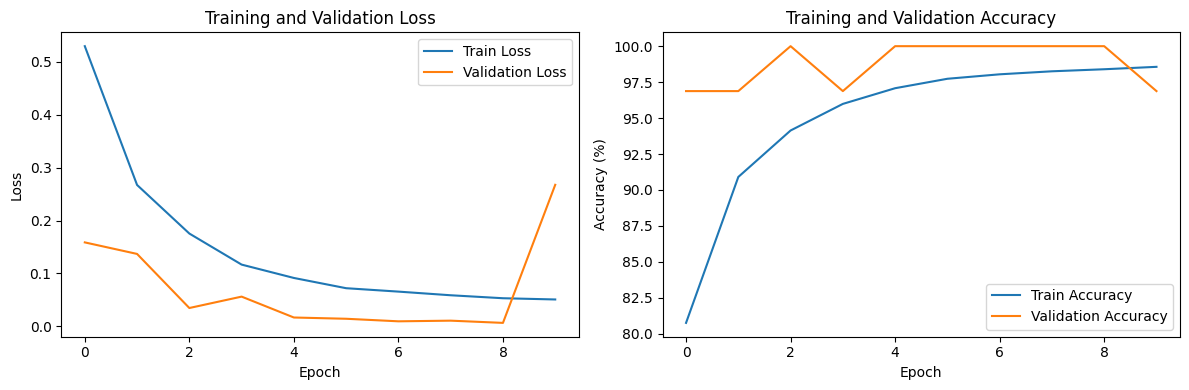

Testing: 100%|██████████| 31/31 [00:28<00:00,  1.09it/s]



Test Results:
Test Accuracy: 97.93%
Precision: 0.9802
F1 Score: 0.9794


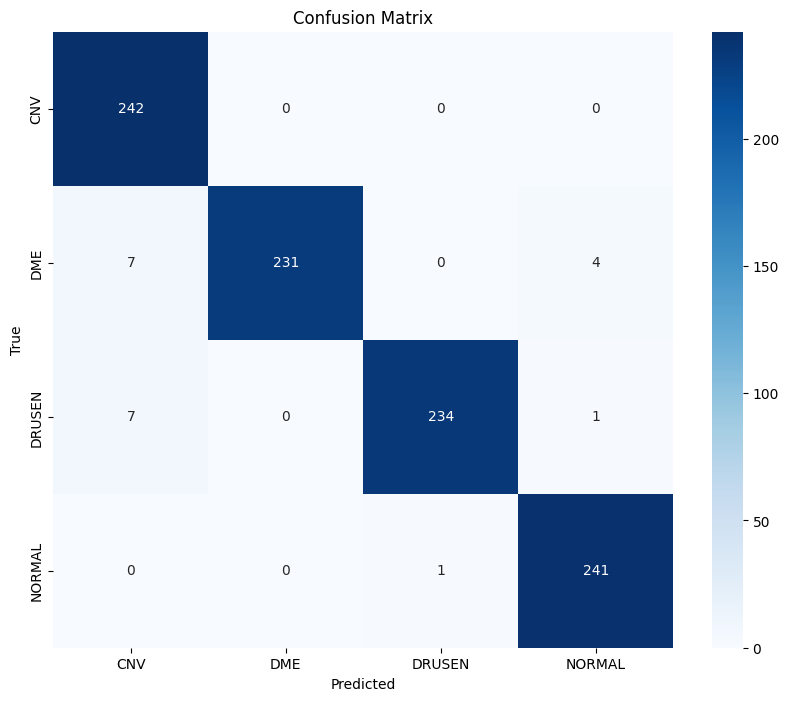

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

# Custom CNN Model
class OCT_CNN(nn.Module):
    def __init__(self):
        super(OCT_CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 4)  # 4 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_epoch_loss = val_loss / len(val_loader)
        val_epoch_acc = 100 * correct / total
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%')
        print(f'Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%')
        print('-' * 60)
    
    return train_losses, val_losses, train_accuracies, val_accuracies

# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in tqdm(test_loader, desc='Testing'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate metrics
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, f1, conf_matrix

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    # Define transforms
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Load datasets
    train_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed1\train", transform=transform)
    val_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed1\val", transform=transform)
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed1\test", transform=transform)
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize model
    model = OCT_CNN().to(device)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Train model
    train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device
    )
    
    # Plot training metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)
    
    # Evaluate model
    test_accuracy, precision, f1, conf_matrix = evaluate_model(model, test_loader, device)
    
    # Print evaluation metrics
    print("\nTest Results:")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    class_names = train_dataset.classes
    plot_confusion_matrix(conf_matrix, class_names)
    
    # Save model
    torch.save(model.state_dict(), 'oct_cnn_model.pth')

if __name__ == "__main__":
    main()

In [3]:
import os
import shutil

# Paths
original_dataset_dir = 'C:\eye\Preprocessed1'
new_dataset_dir = 'C:\eye\Preprocessed2'

# Create new directories
os.makedirs(f'{new_dataset_dir}/train', exist_ok=True)
os.makedirs(f'{new_dataset_dir}/test', exist_ok=True)
os.makedirs(f'{new_dataset_dir}/val', exist_ok=True)

for folder in ['test', 'val']:
    shutil.copytree(
        src=f'{original_dataset_dir}/{folder}', 
        dst=f'{new_dataset_dir}/{folder}', 
        dirs_exist_ok=True  # This fixes the error
    )

# Step 2: Process train folder to limit images to 2000 per class
train_path = f'{original_dataset_dir}/train'
new_train_path = f'{new_dataset_dir}/train'

for class_folder in os.listdir(train_path):
    class_path = os.path.join(train_path, class_folder)
    new_class_path = os.path.join(new_train_path, class_folder)
    os.makedirs(new_class_path, exist_ok=True)

    # Get all images in the class folder
    images = os.listdir(class_path)

    # Limit to 2000 images
    for image in images[:2000]:
        source_path = os.path.join(class_path, image)
        destination_path = os.path.join(new_class_path, image)
        shutil.copy(source_path, destination_path)

print("Preprocessed2 dataset created successfully!")


Preprocessed2 dataset created successfully!


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.optim import lr_scheduler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm
import copy

class TransferLearningModel(nn.Module):
    def __init__(self, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model = models.resnet50(pretrained=True)
        # Modify first conv layer to accept grayscale
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.model(x)

def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs, device):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            total = 0

            for inputs, labels in tqdm(dataloaders[phase], desc=f'{phase} phase'):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total += labels.size(0)

            epoch_loss = running_loss / total
            epoch_acc = running_corrects.double() / total * 100

            if phase == 'train':
                scheduler.step()
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.2f}%')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(best_model_wts, 'best_resnet50_model.pth')

        print()

    print(f'Best val Acc: {best_acc:.2f}%')
    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return accuracy, precision, f1, conf_matrix

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('ResNet50 - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('ResNet50 - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('resnet50_training_metrics.png')
    plt.close()

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Define transforms
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Load datasets
    train_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\train", transform=transform)
    val_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\val", transform=transform)
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=transform)

    # Create dataloaders
    dataloaders = {
        'train': DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4),
        'val': DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4),
        'test': DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
    }

    # Initialize model
    model = TransferLearningModel().to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

    # Train model
    model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
        model, dataloaders, criterion, optimizer, scheduler, 
        num_epochs=10, device=device
    )

    # Save the complete trained model
    torch.save(model.state_dict(), 'resnet50_complete_model.pth')
    print("Trained ResNet50 model saved as 'resnet50_complete_model.pth'")

    # Plot training metrics
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

    # Evaluate model
    test_accuracy, precision, f1, conf_matrix = evaluate_model(
        model, dataloaders['test'], device
    )

    # Print final results
    print(f"\nTest Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.title('ResNet50 - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('resnet50_confusion_matrix.png')
    plt.close()

if __name__ == "__main__":
    main()


Using device: cpu


c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------


train phase: 100%|██████████| 250/250 [35:47<00:00,  8.59s/it]


train Loss: 0.7306 Acc: 69.81%


val phase: 100%|██████████| 1/1 [00:09<00:00, 10.00s/it]


val Loss: 0.3626 Acc: 87.50%

Epoch 2/10
----------


train phase: 100%|██████████| 250/250 [32:12<00:00,  7.73s/it]


train Loss: 0.4257 Acc: 84.04%


val phase: 100%|██████████| 1/1 [00:10<00:00, 10.38s/it]


val Loss: 0.2627 Acc: 93.75%

Epoch 3/10
----------


train phase: 100%|██████████| 250/250 [32:14<00:00,  7.74s/it]


train Loss: 0.2995 Acc: 89.04%


val phase: 100%|██████████| 1/1 [00:09<00:00,  9.40s/it]


val Loss: 0.0975 Acc: 96.88%

Epoch 4/10
----------


train phase: 100%|██████████| 250/250 [31:57<00:00,  7.67s/it]


train Loss: 0.2301 Acc: 91.69%


val phase: 100%|██████████| 1/1 [00:12<00:00, 12.38s/it]


val Loss: 0.1346 Acc: 96.88%

Epoch 5/10
----------


train phase: 100%|██████████| 250/250 [31:51<00:00,  7.65s/it]


train Loss: 0.1686 Acc: 94.17%


val phase: 100%|██████████| 1/1 [00:09<00:00,  9.56s/it]


val Loss: 0.1173 Acc: 96.88%

Epoch 6/10
----------


train phase: 100%|██████████| 250/250 [31:48<00:00,  7.63s/it]


train Loss: 0.1256 Acc: 95.78%


val phase: 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]


val Loss: 0.0919 Acc: 96.88%

Epoch 7/10
----------


train phase: 100%|██████████| 250/250 [32:00<00:00,  7.68s/it]


train Loss: 0.0806 Acc: 97.21%


val phase: 100%|██████████| 1/1 [00:09<00:00,  9.38s/it]


val Loss: 0.1918 Acc: 90.62%

Epoch 8/10
----------


train phase: 100%|██████████| 250/250 [31:50<00:00,  7.64s/it]


train Loss: 0.0438 Acc: 98.64%


val phase: 100%|██████████| 1/1 [00:09<00:00,  9.58s/it]


val Loss: 0.2021 Acc: 93.75%

Epoch 9/10
----------


train phase: 100%|██████████| 250/250 [32:00<00:00,  7.68s/it]


train Loss: 0.0177 Acc: 99.55%


val phase: 100%|██████████| 1/1 [00:09<00:00,  9.47s/it]


val Loss: 0.2150 Acc: 93.75%

Epoch 10/10
----------


train phase: 100%|██████████| 250/250 [5:44:34<00:00, 82.70s/it]     


train Loss: 0.0123 Acc: 99.71%


val phase: 100%|██████████| 1/1 [00:14<00:00, 14.76s/it]


val Loss: 0.2211 Acc: 93.75%

Best val Acc: 96.88%
Trained ResNet50 model saved as 'resnet50_complete_model.pth'


Testing: 100%|██████████| 31/31 [03:02<00:00,  5.90s/it]



Test Accuracy: 93.08%
Precision: 0.9370
F1 Score: 0.9302


In [6]:
import os
import shutil
from tqdm import tqdm
from torchvision import transforms
from PIL import Image
import torch

def create_directory_structure(input_dir, output_dir):
    """Create the same directory structure as the input directory"""
    for root, dirs, _ in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        if relative_path != '.':
            os.makedirs(os.path.join(output_dir, relative_path), exist_ok=True)

def get_preprocessing_transform():
    """Define the preprocessing pipeline"""
    return transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel grayscale image
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

def process_dataset(input_dir, output_dir, transform):
    """Process all images in the dataset while maintaining directory structure"""
    
    # First, create the directory structure
    create_directory_structure(input_dir, output_dir)
    
    # Process each directory
    for root, dirs, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        output_path = os.path.join(output_dir, relative_path)
        
        # Process images in current directory
        if files:
            for img_file in tqdm(files, desc=f"Processing {relative_path}"):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    input_path = os.path.join(root, img_file)
                    output_path = os.path.join(output_dir, relative_path, img_file)
                    
                    try:
                        # Open and preprocess image
                        img = Image.open(input_path).convert('L')
                        img = transform(img)
                        
                        # Convert tensor back to PIL image
                        img = transforms.ToPILImage()(img)
                        
                        # Save preprocessed image
                        img.save(output_path)
                        
                    except Exception as e:
                        print(f"Error processing {input_path}: {str(e)}")

def main():
    # Set dataset paths
    dataset_paths = {
        'train': r"C:\eye\Preprocessed2\train",
        'test': r"C:\eye\Preprocessed2\test",
        'val': r"C:\eye\Preprocessed2\val"  # If you have a validation set
    }
    
    output_base = r"C:\eye\Preprocessed3"
    
    # Delete existing preprocessed folder if it exists
    if os.path.exists(output_base):
        print("Removing existing preprocessed directory...")
        shutil.rmtree(output_base)
    
    # Create output base directory
    os.makedirs(output_base, exist_ok=True)
    
    # Get preprocessing transform
    transform = get_preprocessing_transform()
    
    # Process each dataset split
    for split, input_path in dataset_paths.items():
        if os.path.exists(input_path):
            print(f"\nProcessing {split} set...")
            output_path = os.path.join(output_base, split)
            process_dataset(input_path, output_path, transform)
    
    print(f"\nPreprocessing complete! Preprocessed data saved at: {output_base}")

if __name__ == "__main__":
    main()


Processing train set...


Processing NORMAL: 100%|██████████| 2000/2000 [00:09<00:00, 207.54it/s]



Processing test set...


Processing NORMAL: 100%|██████████| 242/242 [00:01<00:00, 211.28it/s]



Processing val set...


Processing NORMAL: 100%|██████████| 8/8 [00:00<00:00, 176.59it/s]


Preprocessing complete! Preprocessed data saved at: C:\eye\Preprocessed3


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.optim import lr_scheduler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm
import copy
import os

class TransferLearningModel(nn.Module):
    def __init__(self, model_name, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model_name = model_name
        
        if model_name == 'mobilenet_v3':
            self.model = models.mobilenet_v3_small(pretrained=True)
            # Modify first conv layer for grayscale
            self.model.features[0][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[3].in_features
            self.model.classifier[3] = nn.Linear(num_features, num_classes)
        
        elif model_name == 'efficientnet_b0':
            self.model = models.efficientnet_b0(pretrained=True)  
            # Modify first conv layer for grayscale
            self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_features
            self.model.classifier = nn.Sequential(
                nn.Dropout(0.3),
                nn.Linear(num_features, num_classes)
            )
        
        elif model_name == 'squeezenet1_1':
            self.model = models.squeezenet1_1(pretrained=True)
            # Modify first conv layer for grayscale
            self.model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_channels
            self.model.classifier[1] = nn.Conv2d(num_features, num_classes, kernel_size=1)
        
        else:
            raise ValueError(f"Model {model_name} not supported")

    def forward(self, x):
        return self.model(x)


def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs, device, model_name):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            total = 0
            
            for inputs, labels in tqdm(dataloaders[phase], desc=f'{phase} phase'):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total += labels.size(0)
            
            epoch_loss = running_loss / total
            epoch_acc = running_corrects.double() / total * 100
            
            if phase == 'train':
                scheduler.step()
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.2f}%')
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': best_model_wts,
                    'accuracy': best_acc,
                    'classes': dataloaders['train'].dataset.classes
                }, f'best_{model_name}_model.pth')
        
        print()
    
    print(f'Best val Acc: {best_acc:.2f}%')
    model.load_state_dict(best_model_wts)
    return model, train_losses, val_losses, train_accuracies, val_accuracies

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, f1, conf_matrix

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, model_name):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_training_metrics.png')
    plt.close()

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Define transforms with additional augmentation for medical images
    train_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomAffine(degrees=0, translate=(0.05, 0.05)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    val_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Load datasets
    train_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\train", transform=train_transform)
    val_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\val", transform=val_transform)
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=val_transform)
    
    # Create dataloaders
    dataloaders = {
        'train': DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4),
        'val': DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=4),
        'test': DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)
    }
    
    # Models to train
    models_to_train = ['mobilenet_v3', 'efficientnet_b0', 'squeezenet1_1']
    results = {}
    
    for model_name in models_to_train:
        print(f"\nTraining {model_name}...")

        # Initialize model
        model = TransferLearningModel(model_name).to(device)
        
        # Define loss function and optimizer with different learning rates for different layers
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)
        
        scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2, eta_min=1e-6)
        
        # Train model
        model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
            model, dataloaders, criterion, optimizer, scheduler, 
            num_epochs=20, device=device, model_name=model_name
        )
        
        # Save final model
        torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'classes': train_dataset.classes
        }, f'{model_name}_complete_model.pth')
        
        # Plot training metrics
        plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies, model_name)
        
        # Evaluate model
        test_accuracy, precision, f1, conf_matrix = evaluate_model(
            model, dataloaders['test'], device
        )
        
        # Store results
        results[model_name] = {
            'test_accuracy': test_accuracy,
            'precision': precision,
            'f1_score': f1,
            'conf_matrix': conf_matrix
        }
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                    xticklabels=train_dataset.classes,
                    yticklabels=train_dataset.classes)
        plt.title(f'{model_name} - Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(f'{model_name}_confusion_matrix.png')
        plt.close()
    
    # Print final results
    print("\nFinal Results:")
    for model_name, metrics in results.items():
        print(f"\n{model_name}:")
        print(f"Test Accuracy: {metrics['test_accuracy']:.2f}%")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"F1 Score: {metrics['f1_score']:.4f}")

if __name__ == "__main__":
    main()


Using device: cpu

Training mobilenet_v3...


c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
----------


train phase: 100%|██████████| 500/500 [03:14<00:00,  2.57it/s]


train Loss: 0.7581 Acc: 69.03%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.40s/it]


val Loss: 0.6480 Acc: 81.25%

Epoch 2/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


train Loss: 0.5167 Acc: 79.56%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]


val Loss: 0.3325 Acc: 93.75%

Epoch 3/20
----------


train phase: 100%|██████████| 500/500 [03:05<00:00,  2.69it/s]


train Loss: 0.4377 Acc: 82.80%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.55s/it]


val Loss: 0.3668 Acc: 93.75%

Epoch 4/20
----------


train phase: 100%|██████████| 500/500 [03:01<00:00,  2.75it/s]


train Loss: 0.4024 Acc: 84.03%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.48s/it]


val Loss: 0.3337 Acc: 93.75%

Epoch 5/20
----------


train phase: 100%|██████████| 500/500 [03:01<00:00,  2.76it/s]


train Loss: 0.3764 Acc: 84.79%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]


val Loss: 0.2576 Acc: 96.88%

Epoch 6/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


train Loss: 0.3874 Acc: 84.33%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


val Loss: 0.1598 Acc: 96.88%

Epoch 7/20
----------


train phase: 100%|██████████| 500/500 [03:01<00:00,  2.75it/s]


train Loss: 0.3501 Acc: 86.29%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


val Loss: 0.2124 Acc: 96.88%

Epoch 8/20
----------


train phase: 100%|██████████| 500/500 [03:01<00:00,  2.76it/s]


train Loss: 0.3229 Acc: 87.54%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.44s/it]


val Loss: 0.2711 Acc: 93.75%

Epoch 9/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.75it/s]


train Loss: 0.3019 Acc: 88.46%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


val Loss: 0.2850 Acc: 93.75%

Epoch 10/20
----------


train phase: 100%|██████████| 500/500 [03:03<00:00,  2.73it/s]


train Loss: 0.2750 Acc: 89.33%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


val Loss: 0.2262 Acc: 93.75%

Epoch 11/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


train Loss: 0.2525 Acc: 89.99%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.47s/it]


val Loss: 0.1636 Acc: 96.88%

Epoch 12/20
----------


train phase: 100%|██████████| 500/500 [03:03<00:00,  2.73it/s]


train Loss: 0.2422 Acc: 90.33%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.48s/it]


val Loss: 0.2192 Acc: 96.88%

Epoch 13/20
----------


train phase: 100%|██████████| 500/500 [03:01<00:00,  2.76it/s]


train Loss: 0.2220 Acc: 91.70%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


val Loss: 0.2281 Acc: 96.88%

Epoch 14/20
----------


train phase: 100%|██████████| 500/500 [03:03<00:00,  2.72it/s]


train Loss: 0.2130 Acc: 92.07%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.50s/it]


val Loss: 0.2138 Acc: 96.88%

Epoch 15/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


train Loss: 0.2093 Acc: 92.22%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.50s/it]


val Loss: 0.2290 Acc: 96.88%

Epoch 16/20
----------


train phase: 100%|██████████| 500/500 [03:01<00:00,  2.75it/s]


train Loss: 0.2410 Acc: 90.44%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.41s/it]


val Loss: 0.1877 Acc: 96.88%

Epoch 17/20
----------


train phase: 100%|██████████| 500/500 [03:05<00:00,  2.69it/s]


train Loss: 0.2362 Acc: 90.74%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.43s/it]


val Loss: 0.1630 Acc: 93.75%

Epoch 18/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


train Loss: 0.2250 Acc: 91.27%


val phase: 100%|██████████| 2/2 [00:08<00:00,  4.07s/it]


val Loss: 0.1338 Acc: 96.88%

Epoch 19/20
----------


train phase: 100%|██████████| 500/500 [03:02<00:00,  2.74it/s]


train Loss: 0.2038 Acc: 92.14%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


val Loss: 0.1707 Acc: 93.75%

Epoch 20/20
----------


train phase: 100%|██████████| 500/500 [03:06<00:00,  2.69it/s]


train Loss: 0.1915 Acc: 92.56%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


val Loss: 0.2582 Acc: 96.88%

Best val Acc: 96.88%


Testing: 100%|██████████| 61/61 [00:11<00:00,  5.24it/s]
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Training efficientnet_b0...
Epoch 1/20
----------


train phase: 100%|██████████| 500/500 [13:27<00:00,  1.62s/it]


train Loss: 0.6862 Acc: 71.85%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.76s/it]


val Loss: 0.1293 Acc: 96.88%

Epoch 2/20
----------


train phase: 100%|██████████| 500/500 [13:26<00:00,  1.61s/it]


train Loss: 0.4001 Acc: 84.81%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]


val Loss: 0.1898 Acc: 93.75%

Epoch 3/20
----------


train phase: 100%|██████████| 500/500 [13:22<00:00,  1.61s/it]


train Loss: 0.3159 Acc: 87.92%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.68s/it]


val Loss: 0.1500 Acc: 93.75%

Epoch 4/20
----------


train phase: 100%|██████████| 500/500 [13:15<00:00,  1.59s/it]


train Loss: 0.2770 Acc: 89.64%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.70s/it]


val Loss: 0.0980 Acc: 96.88%

Epoch 5/20
----------


train phase: 100%|██████████| 500/500 [15:55<00:00,  1.91s/it]


train Loss: 0.2436 Acc: 90.89%


val phase: 100%|██████████| 2/2 [00:08<00:00,  4.19s/it]


val Loss: 0.0750 Acc: 96.88%

Epoch 6/20
----------


train phase: 100%|██████████| 500/500 [16:23<00:00,  1.97s/it]


train Loss: 0.2702 Acc: 89.76%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.90s/it]


val Loss: 0.1549 Acc: 93.75%

Epoch 7/20
----------


train phase: 100%|██████████| 500/500 [15:59<00:00,  1.92s/it]


train Loss: 0.2352 Acc: 91.27%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.83s/it]


val Loss: 0.0782 Acc: 100.00%

Epoch 8/20
----------


train phase: 100%|██████████| 500/500 [14:32<00:00,  1.75s/it]


train Loss: 0.2122 Acc: 91.79%


val phase: 100%|██████████| 2/2 [00:08<00:00,  4.43s/it]


val Loss: 0.0243 Acc: 100.00%

Epoch 9/20
----------


train phase: 100%|██████████| 500/500 [15:41<00:00,  1.88s/it]


train Loss: 0.1863 Acc: 92.88%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.87s/it]


val Loss: 0.0239 Acc: 100.00%

Epoch 10/20
----------


train phase: 100%|██████████| 500/500 [16:14<00:00,  1.95s/it]


train Loss: 0.1563 Acc: 93.97%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.64s/it]


val Loss: 0.0375 Acc: 100.00%

Epoch 11/20
----------


train phase: 100%|██████████| 500/500 [15:21<00:00,  1.84s/it]


train Loss: 0.1440 Acc: 94.53%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.92s/it]


val Loss: 0.0204 Acc: 100.00%

Epoch 12/20
----------


train phase: 100%|██████████| 500/500 [13:44<00:00,  1.65s/it]


train Loss: 0.1219 Acc: 95.43%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.70s/it]


val Loss: 0.0192 Acc: 100.00%

Epoch 13/20
----------


train phase: 100%|██████████| 500/500 [14:59<00:00,  1.80s/it]


train Loss: 0.1150 Acc: 95.73%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]


val Loss: 0.0113 Acc: 100.00%

Epoch 14/20
----------


train phase: 100%|██████████| 500/500 [13:28<00:00,  1.62s/it]


train Loss: 0.1083 Acc: 96.24%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.68s/it]


val Loss: 0.0101 Acc: 100.00%

Epoch 15/20
----------


train phase: 100%|██████████| 500/500 [13:42<00:00,  1.65s/it]


train Loss: 0.1039 Acc: 96.09%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]


val Loss: 0.0131 Acc: 100.00%

Epoch 16/20
----------


train phase: 100%|██████████| 500/500 [13:31<00:00,  1.62s/it]


train Loss: 0.1435 Acc: 94.58%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.80s/it]


val Loss: 0.0200 Acc: 100.00%

Epoch 17/20
----------


train phase: 100%|██████████| 500/500 [13:34<00:00,  1.63s/it]


train Loss: 0.1375 Acc: 94.92%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.84s/it]


val Loss: 0.0185 Acc: 100.00%

Epoch 18/20
----------


train phase: 100%|██████████| 500/500 [13:33<00:00,  1.63s/it]


train Loss: 0.1264 Acc: 95.29%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]


val Loss: 0.0547 Acc: 96.88%

Epoch 19/20
----------


train phase: 100%|██████████| 500/500 [13:33<00:00,  1.63s/it]


train Loss: 0.1066 Acc: 96.12%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.74s/it]


val Loss: 0.0080 Acc: 100.00%

Epoch 20/20
----------


train phase: 100%|██████████| 500/500 [13:44<00:00,  1.65s/it]


train Loss: 0.1016 Acc: 96.21%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.67s/it]


val Loss: 0.0195 Acc: 100.00%

Best val Acc: 100.00%


Testing: 100%|██████████| 61/61 [00:30<00:00,  2.03it/s]
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Training squeezenet1_1...
Epoch 1/20
----------


train phase: 100%|██████████| 500/500 [04:17<00:00,  1.94it/s]


train Loss: 0.8881 Acc: 59.06%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 0.4901 Acc: 71.88%

Epoch 2/20
----------


train phase: 100%|██████████| 500/500 [04:16<00:00,  1.95it/s]


train Loss: 0.5476 Acc: 77.83%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.58s/it]


val Loss: 0.3384 Acc: 87.50%

Epoch 3/20
----------


train phase: 100%|██████████| 500/500 [04:16<00:00,  1.95it/s]


train Loss: 0.4443 Acc: 82.50%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


val Loss: 0.2313 Acc: 90.62%

Epoch 4/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.3861 Acc: 85.19%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 0.2429 Acc: 93.75%

Epoch 5/20
----------


train phase: 100%|██████████| 500/500 [04:16<00:00,  1.95it/s]


train Loss: 0.3501 Acc: 86.71%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.70s/it]


val Loss: 0.1608 Acc: 96.88%

Epoch 6/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.95it/s]


train Loss: 0.4105 Acc: 84.29%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.63s/it]


val Loss: 0.3994 Acc: 93.75%

Epoch 7/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.3813 Acc: 85.21%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


val Loss: 0.2064 Acc: 96.88%

Epoch 8/20
----------


train phase: 100%|██████████| 500/500 [04:14<00:00,  1.96it/s]


train Loss: 0.3463 Acc: 86.62%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


val Loss: 0.0975 Acc: 96.88%

Epoch 9/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.3219 Acc: 87.60%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.52s/it]


val Loss: 0.2001 Acc: 93.75%

Epoch 10/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.3036 Acc: 88.84%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.50s/it]


val Loss: 0.1406 Acc: 96.88%

Epoch 11/20
----------


train phase: 100%|██████████| 500/500 [04:17<00:00,  1.94it/s]


train Loss: 0.2802 Acc: 89.50%


val phase: 100%|██████████| 2/2 [00:09<00:00,  4.99s/it]


val Loss: 0.1329 Acc: 96.88%

Epoch 12/20
----------


train phase: 100%|██████████| 500/500 [04:17<00:00,  1.94it/s]


train Loss: 0.2593 Acc: 89.89%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.59s/it]


val Loss: 0.1708 Acc: 96.88%

Epoch 13/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.95it/s]


train Loss: 0.2473 Acc: 90.55%


val phase: 100%|██████████| 2/2 [00:06<00:00,  3.48s/it]


val Loss: 0.1121 Acc: 96.88%

Epoch 14/20
----------


train phase: 100%|██████████| 500/500 [04:26<00:00,  1.87it/s]


train Loss: 0.2371 Acc: 91.24%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.51s/it]


val Loss: 0.1472 Acc: 96.88%

Epoch 15/20
----------


train phase: 100%|██████████| 500/500 [04:14<00:00,  1.96it/s]


train Loss: 0.2214 Acc: 91.86%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 0.1087 Acc: 96.88%

Epoch 16/20
----------


train phase: 100%|██████████| 500/500 [04:17<00:00,  1.94it/s]


train Loss: 0.2976 Acc: 88.98%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 0.0809 Acc: 93.75%

Epoch 17/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.2885 Acc: 89.04%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


val Loss: 0.2889 Acc: 93.75%

Epoch 18/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.2748 Acc: 89.75%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.56s/it]


val Loss: 0.2034 Acc: 96.88%

Epoch 19/20
----------


train phase: 100%|██████████| 500/500 [04:14<00:00,  1.96it/s]


train Loss: 0.2625 Acc: 90.38%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


val Loss: 0.0905 Acc: 96.88%

Epoch 20/20
----------


train phase: 100%|██████████| 500/500 [04:15<00:00,  1.96it/s]


train Loss: 0.2464 Acc: 91.03%


val phase: 100%|██████████| 2/2 [00:07<00:00,  3.53s/it]


val Loss: 0.0623 Acc: 96.88%

Best val Acc: 96.88%


Testing: 100%|██████████| 61/61 [00:22<00:00,  2.76it/s]



Final Results:

mobilenet_v3:
Test Accuracy: 92.98%
Precision: 0.9299
F1 Score: 0.9296

efficientnet_b0:
Test Accuracy: 96.49%
Precision: 0.9656
F1 Score: 0.9650

squeezenet1_1:
Test Accuracy: 91.94%
Precision: 0.9209
F1 Score: 0.9186


In [9]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the same model architecture as during training
class OCT_CNN(nn.Module):
    def __init__(self):
        super(OCT_CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 4)  # 4 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [10]:
# Load the trained model
model = OCT_CNN()  # Your CNN model
model.load_state_dict(torch.load('oct_cnn_model.pth'))  # Load the model weights
model.eval()  # Set the model to evaluation mode


C:\Users\Indraneel\AppData\Local\Temp\ipykernel_9404\768752938.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('oct_cnn_model.pth'))  # 

OCT_CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=4, bias=True)
)

In [13]:
# Define the transformation that was applied during training
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224, 224)),  # Resize to the size expected by the model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]),  # Match the normalization
])

# Load and preprocess the image
image_path = r'C:\eye\Preprocessed2\test\CNV\CNV-53018-2.jpeg'  # Replace with your image path
image = Image.open(image_path)

# Apply transformations
input_image = transform(image).unsqueeze(0)  # Add batch dimension


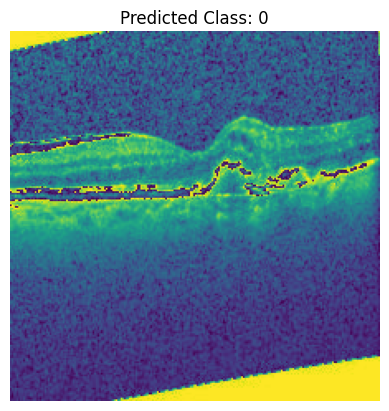

Predicted Class: 0


In [14]:
# Perform the prediction
with torch.no_grad():
    outputs = model(input_image)
    _, predicted_class = torch.max(outputs, 1)

# Display the image and predicted class
plt.imshow(image)
plt.title(f'Predicted Class: {predicted_class.item()}')
plt.axis('off')
plt.show()

# Output the predicted class
print(f"Predicted Class: {predicted_class.item()}")


C:\Users\Indraneel\AppData\Local\Temp\ipykernel_9404\4254372439.py:110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}_mo

Using device: cpu
Predicted Class: Class 0


Testing: 100%|██████████| 61/61 [00:05<00:00, 10.66it/s]


Test Accuracy: 89.88%
Precision: 0.8987
F1 Score: 0.8982


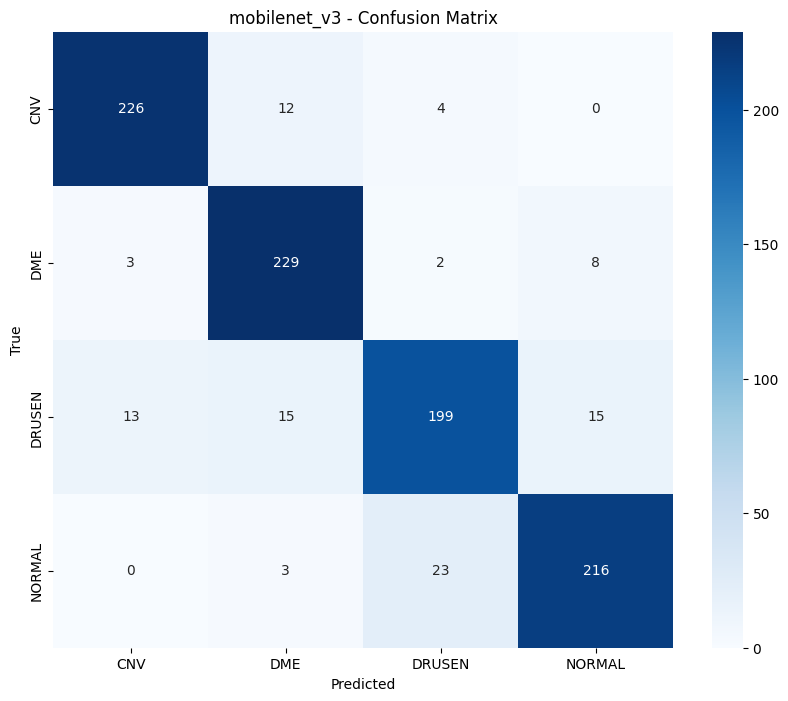

In [15]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm

class TransferLearningModel(nn.Module):
    def __init__(self, model_name, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model_name = model_name
        
        if model_name == 'mobilenet_v3':
            self.model = models.mobilenet_v3_small(weights='IMAGENET1K_V1')
            self.model.features[0][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[3].in_features
            self.model.classifier[3] = nn.Linear(num_features, num_classes)
        
        elif model_name == 'efficientnet_b0':
            self.model = models.efficientnet_b0(weights='IMAGENET1K_V1')  
            self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_features
            self.model.classifier = nn.Sequential(
                nn.Dropout(0.3),
                nn.Linear(num_features, num_classes)
            )
        
        elif model_name == 'squeezenet1_1':
            self.model = models.squeezenet1_1(weights='IMAGENET1K_V1')
            self.model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_channels
            self.model.classifier[1] = nn.Conv2d(num_features, num_classes, kernel_size=1)
        
        else:
            raise ValueError(f"Model {model_name} not supported")

    def forward(self, x):
        return self.model(x)


def predict(model, image_path, device, transform, class_names):
    # Load the image
    from PIL import Image
    img = Image.open(image_path).convert("L")
    
    # Apply the same transformation as during training
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted_class = torch.max(outputs, 1)
        predicted_label = class_names[predicted_class.item()]
    
    return predicted_label


def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, f1, conf_matrix


def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Define transforms (for both training and testing)
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Load the model (you can choose the model here: 'mobilenet_v3', 'efficientnet_b0', or 'squeezenet1_1')
    model_name = 'mobilenet_v3'  # Change this to test different models
    model = TransferLearningModel(model_name).to(device)
    
    # Load the trained model
    model.load_state_dict(torch.load(f'best_{model_name}_model.pth')['model_state_dict'])
    
    # Get class names (from the training dataset)
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Change these to your actual class names
    
    # Predict on a single image
    image_path = r"C:\eye\Preprocessed2\test\CNV\CNV-53018-2.jpeg"  # Provide path to your test image
    prediction = predict(model, image_path, device, transform, class_names)
    print(f"Predicted Class: {prediction}")
    
    # Optionally, you can evaluate the model on the test dataset
    # Load test dataset
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
    
    # Evaluate model on test set
    test_accuracy, precision, f1, conf_matrix = evaluate_model(model, test_loader, device)
    
    # Print evaluation metrics
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


if __name__ == "__main__":
    main()


Using device: cpu


C:\Users\Indraneel\AppData\Local\Temp\ipykernel_9404\2550168441.py:110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}_mo

Predicted Class: Class 0


Testing: 100%|██████████| 61/61 [00:23<00:00,  2.64it/s]


Test Accuracy: 98.35%
Precision: 0.9836
F1 Score: 0.9835


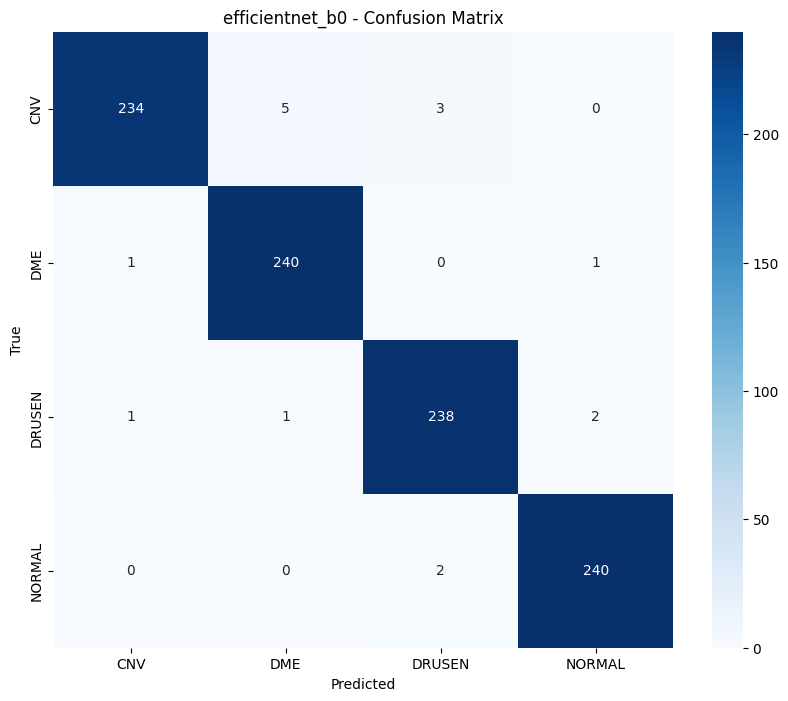

In [16]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm

class TransferLearningModel(nn.Module):
    def __init__(self, model_name, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model_name = model_name
        
        if model_name == 'mobilenet_v3':
            self.model = models.mobilenet_v3_small(weights='IMAGENET1K_V1')
            self.model.features[0][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[3].in_features
            self.model.classifier[3] = nn.Linear(num_features, num_classes)
        
        elif model_name == 'efficientnet_b0':
            self.model = models.efficientnet_b0(weights='IMAGENET1K_V1')  
            self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_features
            self.model.classifier = nn.Sequential(
                nn.Dropout(0.3),
                nn.Linear(num_features, num_classes)
            )
        
        elif model_name == 'squeezenet1_1':
            self.model = models.squeezenet1_1(weights='IMAGENET1K_V1')
            self.model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_channels
            self.model.classifier[1] = nn.Conv2d(num_features, num_classes, kernel_size=1)
        
        else:
            raise ValueError(f"Model {model_name} not supported")

    def forward(self, x):
        return self.model(x)


def predict(model, image_path, device, transform, class_names):
    # Load the image
    from PIL import Image
    img = Image.open(image_path).convert("L")
    
    # Apply the same transformation as during training
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted_class = torch.max(outputs, 1)
        predicted_label = class_names[predicted_class.item()]
    
    return predicted_label


def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, f1, conf_matrix


def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Define transforms (for both training and testing)
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Load the model (you can choose the model here: 'mobilenet_v3', 'efficientnet_b0', or 'squeezenet1_1')
    model_name = 'efficientnet_b0'  # Change this to test different models
    model = TransferLearningModel(model_name).to(device)
    
    # Load the trained model
    model.load_state_dict(torch.load(f'best_{model_name}_model.pth')['model_state_dict'])
    
    # Get class names (from the training dataset)
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Change these to your actual class names
    
    # Predict on a single image
    image_path = r"C:\eye\Preprocessed2\test\CNV\CNV-53018-2.jpeg"  # Provide path to your test image
    prediction = predict(model, image_path, device, transform, class_names)
    print(f"Predicted Class: {prediction}")
    
    # Optionally, you can evaluate the model on the test dataset
    # Load test dataset
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
    
    # Evaluate model on test set
    test_accuracy, precision, f1, conf_matrix = evaluate_model(model, test_loader, device)
    
    # Print evaluation metrics
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


if __name__ == "__main__":
    main()


C:\Users\Indraneel\AppData\Local\Temp\ipykernel_9404\97881019.py:110: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f'best_{model_name}_mode

Using device: cpu
Predicted Class: Class 0


Testing: 100%|██████████| 61/61 [00:15<00:00,  4.00it/s]


Test Accuracy: 93.18%
Precision: 0.9344
F1 Score: 0.9310


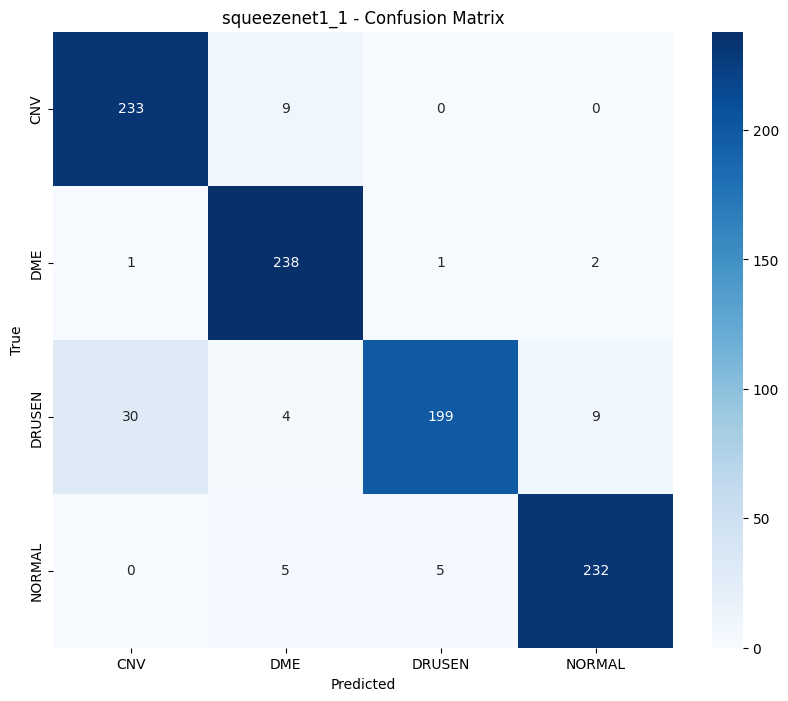

In [17]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm

class TransferLearningModel(nn.Module):
    def __init__(self, model_name, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model_name = model_name
        
        if model_name == 'mobilenet_v3':
            self.model = models.mobilenet_v3_small(weights='IMAGENET1K_V1')
            self.model.features[0][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[3].in_features
            self.model.classifier[3] = nn.Linear(num_features, num_classes)
        
        elif model_name == 'efficientnet_b0':
            self.model = models.efficientnet_b0(weights='IMAGENET1K_V1')  
            self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_features
            self.model.classifier = nn.Sequential(
                nn.Dropout(0.3),
                nn.Linear(num_features, num_classes)
            )
        
        elif model_name == 'squeezenet1_1':
            self.model = models.squeezenet1_1(weights='IMAGENET1K_V1')
            self.model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_channels
            self.model.classifier[1] = nn.Conv2d(num_features, num_classes, kernel_size=1)
        
        else:
            raise ValueError(f"Model {model_name} not supported")

    def forward(self, x):
        return self.model(x)


def predict(model, image_path, device, transform, class_names):
    # Load the image
    from PIL import Image
    img = Image.open(image_path).convert("L")
    
    # Apply the same transformation as during training
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted_class = torch.max(outputs, 1)
        predicted_label = class_names[predicted_class.item()]
    
    return predicted_label


def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, f1, conf_matrix


def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Define transforms (for both training and testing)
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Load the model (you can choose the model here: 'mobilenet_v3', 'efficientnet_b0', or 'squeezenet1_1')
    model_name = 'squeezenet1_1'  # Change this to test different models
    model = TransferLearningModel(model_name).to(device)
    
    # Load the trained model
    model.load_state_dict(torch.load(f'best_{model_name}_model.pth')['model_state_dict'])
    
    # Get class names (from the training dataset)
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Change these to your actual class names
    
    # Predict on a single image
    image_path = r"C:\eye\Preprocessed2\test\CNV\CNV-53018-2.jpeg"  # Provide path to your test image
    prediction = predict(model, image_path, device, transform, class_names)
    print(f"Predicted Class: {prediction}")
    
    # Optionally, you can evaluate the model on the test dataset
    # Load test dataset
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
    
    # Evaluate model on test set
    test_accuracy, precision, f1, conf_matrix = evaluate_model(model, test_loader, device)
    
    # Print evaluation metrics
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


if __name__ == "__main__":
    main()


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm

class TransferLearningModel(nn.Module):
    def __init__(self, model_name, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model_name = model_name
        
        if model_name == 'mobilenet_v3':
            self.model = models.mobilenet_v3_small(weights='IMAGENET1K_V1')
            self.model.features[0][0] = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[3].in_features
            self.model.classifier[3] = nn.Linear(num_features, num_classes)
        
        elif model_name == 'efficientnet_b0':
            self.model = models.efficientnet_b0(weights='IMAGENET1K_V1')  
            self.model.features[0][0] = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_features
            self.model.classifier = nn.Sequential(
                nn.Dropout(0.3),
                nn.Linear(num_features, num_classes)
            )
        
        elif model_name == 'squeezenet1_1':
            self.model = models.squeezenet1_1(weights='IMAGENET1K_V1')
            self.model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1, bias=False)
            num_features = self.model.classifier[1].in_channels
            self.model.classifier[1] = nn.Conv2d(num_features, num_classes, kernel_size=1)
        
        else:
            raise ValueError(f"Model {model_name} not supported")

    def forward(self, x):
        return self.model(x)


def predict(model, image_path, device, transform, class_names):
    # Load the image
    from PIL import Image
    img = Image.open(image_path).convert("L")
    
    # Apply the same transformation as during training
    img_tensor = transform(img).unsqueeze(0).to(device)
    
    # Predict
    model.eval()
    with torch.no_grad():
        outputs = model(img_tensor)
        _, predicted_class = torch.max(outputs, 1)
        predicted_label = class_names[predicted_class.item()]
    
    return predicted_label


def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    return accuracy, precision, f1, conf_matrix


def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # Define transforms (for both training and testing)
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])
    
    # Load the model (you can choose the model here: 'mobilenet_v3', 'efficientnet_b0', or 'squeezenet1_1')
    model_name = 'mobilevit_s'  # Change this to test different models
    model = TransferLearningModel(model_name).to(device)
    
    # Load the trained model
    model.load_state_dict(torch.load(f'best_{model_name}_model.pth')['model_state_dict'])
    
    # Get class names (from the training dataset)
    class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']  # Change these to your actual class names
    
    # Predict on a single image
    image_path = r"C:\eye\Preprocessed2\test\CNV\CNV-53018-2.jpeg"  # Provide path to your test image
    prediction = predict(model, image_path, device, transform, class_names)
    print(f"Predicted Class: {prediction}")
    
    # Optionally, you can evaluate the model on the test dataset
    # Load test dataset
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
    
    # Evaluate model on test set
    test_accuracy, precision, f1, conf_matrix = evaluate_model(model, test_loader, device)
    
    # Print evaluation metrics
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


if __name__ == "__main__":
    main()


c:\eye\neel\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Indraneel\.cache\huggingface\hub\models--timm--deit_tiny_patch16_224.fb_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)



Training MobileViT-S...
Epoch [1/10], Loss: 0.4358
Epoch [2/10], Loss: 0.2059
Epoch [3/10], Loss: 0.1384
Epoch [4/10], Loss: 0.1106
Epoch [5/10], Loss: 0.0843
Epoch [6/10], Loss: 0.0728
Epoch [7/10], Loss: 0.0678
Epoch [8/10], Loss: 0.0465
Epoch [9/10], Loss: 0.0435
Epoch [10/10], Loss: 0.0476
MobileViT-S Test Accuracy: 97.83%

Training DeiT-Tiny...
Epoch [1/10], Loss: 1.4035
Epoch [2/10], Loss: 1.2334
Epoch [3/10], Loss: 1.1209
Epoch [4/10], Loss: 1.0644
Epoch [5/10], Loss: 1.0232
Epoch [6/10], Loss: 0.9778
Epoch [7/10], Loss: 0.9529
Epoch [8/10], Loss: 0.9547
Epoch [9/10], Loss: 0.9237
Epoch [10/10], Loss: 0.9098
DeiT-Tiny Test Accuracy: 54.34%


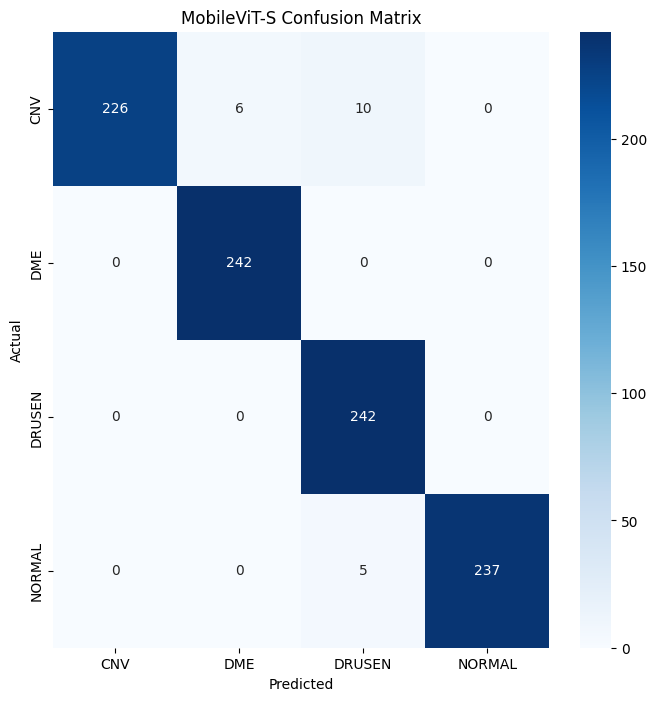

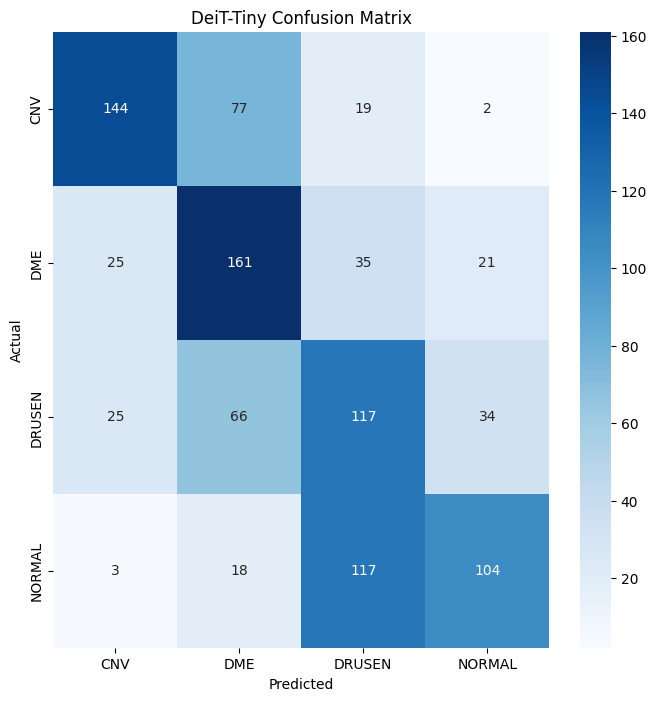


Models saved as 'mobilevit_s_oct_model.pth' and 'deit_tiny_oct_model.pth'


In [16]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from timm.models import create_model

# ==========================
# 🔧 Preprocessing Transforms
# ==========================
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((224, 224)),                # Resize to 224x224
    transforms.ToTensor(),                        # Convert to tensor
    transforms.Normalize(mean=[0.5], std=[0.5])   # Normalize
])

# ==========================
# 📂 Load Dataset
# ==========================
train_data = datasets.ImageFolder(r'C:\eye\Preprocessed2\train', transform=transform)
test_data = datasets.ImageFolder(r'C:\eye\Preprocessed2\test', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# ==========================
# 📦 Load and Modify MobileViT-S
# ==========================
mobilevit_model = create_model('mobilevit_s', pretrained=True)

# Modify the stem layer to accept 1-channel input
mobilevit_model.stem.conv = nn.Conv2d(1, mobilevit_model.stem.conv.out_channels, kernel_size=3, stride=2, padding=1, bias=False)
mobilevit_model.head.fc = nn.Linear(mobilevit_model.head.fc.in_features, len(train_data.classes))

# ==========================
# 📦 Load and Modify DeiT-Tiny
# ==========================
deit_model = create_model('deit_tiny_patch16_224', pretrained=True)

# Modify the patch embedding layer to accept 1-channel input
deit_model.patch_embed.proj = nn.Conv2d(1, deit_model.patch_embed.proj.out_channels, kernel_size=16, stride=16, bias=False)
deit_model.head = nn.Linear(deit_model.head.in_features, len(train_data.classes))

# ==========================
# 🔧 Device Setup
# ==========================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mobilevit_model = mobilevit_model.to(device)
deit_model = deit_model.to(device)

# ==========================
# 🔧 Loss and Optimizer
# ==========================
criterion = nn.CrossEntropyLoss()
optimizer_mobilevit = optim.Adam(mobilevit_model.parameters(), lr=0.001)
optimizer_deit = optim.Adam(deit_model.parameters(), lr=0.001)

# ==========================
# 🏋️ Training Loop Function
# ==========================
def train_model(model, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# ==========================
# 📊 Evaluate Function
# ==========================
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    accuracy = 100 * correct / total
    return accuracy, y_true, y_pred

# ==========================
# ✅ Train and Evaluate Both Models
# ==========================
print("\nTraining MobileViT-S...")
train_model(mobilevit_model, optimizer_mobilevit)
mobilevit_accuracy, mobilevit_y_true, mobilevit_y_pred = evaluate_model(mobilevit_model, test_loader)
torch.save(mobilevit_model.state_dict(), 'mobilevit_s_oct_model.pth')
print(f"MobileViT-S Test Accuracy: {mobilevit_accuracy:.2f}%")

print("\nTraining DeiT-Tiny...")
train_model(deit_model, optimizer_deit)
deit_accuracy, deit_y_true, deit_y_pred = evaluate_model(deit_model, test_loader)
torch.save(deit_model.state_dict(), 'deit_tiny_oct_model.pth')
print(f"DeiT-Tiny Test Accuracy: {deit_accuracy:.2f}%")

# ==========================
# 📊 Plot Confusion Matrix
# ==========================
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.classes, yticklabels=train_data.classes)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot metrics for MobileViT-S
plot_confusion_matrix(mobilevit_y_true, mobilevit_y_pred, "MobileViT-S")

# Plot metrics for DeiT-Tiny
plot_confusion_matrix(deit_y_true, deit_y_pred, "DeiT-Tiny")

# ==========================
# ✅ Save Model Files
# ==========================
print("\nModels saved as 'mobilevit_s_oct_model.pth' and 'deit_tiny_oct_model.pth'")


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.optim import lr_scheduler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from tqdm import tqdm
import copy

class TransferLearningModel(nn.Module):
    def __init__(self, num_classes=4):
        super(TransferLearningModel, self).__init__()
        self.model = models.resnet18(pretrained=True)  # Use ResNet-18
        # Modify first conv layer to accept grayscale
        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.model(x)

def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs, device):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Dictionary to store epoch metrics
    epoch_metrics = {
        'train_loss': [],
        'val_loss': [],
        'train_accuracy': [],
        'val_accuracy': [],
    }

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            total = 0

            for inputs, labels in tqdm(dataloaders[phase], desc=f'{phase} phase'):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                total += labels.size(0)

            epoch_loss = running_loss / total
            epoch_acc = running_corrects.double() / total * 100

            # Save metrics
            epoch_metrics[f'{phase}_loss'].append(epoch_loss)
            epoch_metrics[f'{phase}_accuracy'].append(epoch_acc)

            if phase == 'train':
                scheduler.step()
            else:
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    torch.save(best_model_wts, 'best_resnet18_model.pth')

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.2f}%')

        print()

    print(f'Best val Acc: {best_acc:.2f}%')
    model.load_state_dict(best_model_wts)

    # Save all metrics
    torch.save(epoch_metrics, 'training_metrics.pth')
    print("Training metrics saved as 'training_metrics.pth'")

    return model, epoch_metrics

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return accuracy, precision, f1, conf_matrix

def plot_metrics(epoch_metrics):
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epoch_metrics['train_loss'], label='Train Loss')
    plt.plot(epoch_metrics['val_loss'], label='Validation Loss')
    plt.title('ResNet18 - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epoch_metrics['train_accuracy'], label='Train Accuracy')
    plt.plot(epoch_metrics['val_accuracy'], label='Validation Accuracy')
    plt.title('ResNet18 - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('resnet18_training_metrics.png')
    plt.close()

def main():
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Define transforms
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5], std=[0.5])
    ])

    # Load datasets
    train_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\train", transform=transform)
    val_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\val", transform=transform)
    test_dataset = datasets.ImageFolder(r"C:\eye\Preprocessed2\test", transform=transform)

    # Create dataloaders
    dataloaders = {
        'train': DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4),
        'val': DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4),
        'test': DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
    }

    # Initialize model
    model = TransferLearningModel().to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
    scheduler = lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

    # Train model
    model, epoch_metrics = train_model(
        model, dataloaders, criterion, optimizer, scheduler, 
        num_epochs=10, device=device
    )

    # Save the complete trained model
    torch.save(model.state_dict(), 'resnet18_complete_model.pth')
    print("Trained ResNet18 model saved as 'resnet18_complete_model.pth'")

    # Plot training metrics
    plot_metrics(epoch_metrics)

    # Evaluate model
    test_accuracy, precision, f1, conf_matrix = evaluate_model(
        model, dataloaders['test'], device
    )

    # Print final results
    print(f"\nTest Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=train_dataset.classes,
                yticklabels=train_dataset.classes)
    plt.title('ResNet18 - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('resnet18_confusion_matrix.png')
    plt.close()

if __name__ == "__main__":
    main()


Using device: cpu


c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\eye\neel\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10
----------


train phase: 100%|██████████| 250/250 [10:56<00:00,  2.62s/it]


train Loss: 0.6126 Acc: 76.12%


val phase: 100%|██████████| 1/1 [00:08<00:00,  8.10s/it]


val Loss: 0.6436 Acc: 90.62%

Epoch 2/10
----------


train phase: 100%|██████████| 250/250 [10:19<00:00,  2.48s/it]


train Loss: 0.3179 Acc: 88.45%


val phase: 100%|██████████| 1/1 [00:10<00:00, 10.70s/it]


val Loss: 0.5081 Acc: 84.38%

Epoch 3/10
----------


train phase: 100%|██████████| 250/250 [11:45<00:00,  2.82s/it]


train Loss: 0.2424 Acc: 91.03%


val phase: 100%|██████████| 1/1 [00:08<00:00,  8.51s/it]


val Loss: 0.0316 Acc: 100.00%

Epoch 4/10
----------


train phase: 100%|██████████| 250/250 [11:44<00:00,  2.82s/it]


train Loss: 0.1755 Acc: 93.70%


val phase: 100%|██████████| 1/1 [00:08<00:00,  8.46s/it]


val Loss: 0.2108 Acc: 93.75%

Epoch 5/10
----------


train phase: 100%|██████████| 250/250 [11:04<00:00,  2.66s/it]


train Loss: 0.1310 Acc: 95.46%


val phase: 100%|██████████| 1/1 [00:08<00:00,  8.47s/it]


val Loss: 0.1647 Acc: 93.75%

Epoch 6/10
----------


train phase: 100%|██████████| 250/250 [11:14<00:00,  2.70s/it]


train Loss: 0.0908 Acc: 97.02%


val phase: 100%|██████████| 1/1 [00:08<00:00,  8.27s/it]


val Loss: 0.3406 Acc: 90.62%

Epoch 7/10
----------


train phase: 100%|██████████| 250/250 [10:36<00:00,  2.55s/it]


train Loss: 0.0479 Acc: 98.35%


val phase: 100%|██████████| 1/1 [00:07<00:00,  7.72s/it]


val Loss: 0.2243 Acc: 96.88%

Epoch 8/10
----------


train phase: 100%|██████████| 250/250 [10:09<00:00,  2.44s/it]


train Loss: 0.0205 Acc: 99.49%


val phase: 100%|██████████| 1/1 [00:07<00:00,  7.65s/it]


val Loss: 0.1214 Acc: 96.88%

Epoch 9/10
----------


train phase: 100%|██████████| 250/250 [10:09<00:00,  2.44s/it]


train Loss: 0.0099 Acc: 99.76%


val phase: 100%|██████████| 1/1 [00:07<00:00,  7.42s/it]


val Loss: 0.0972 Acc: 96.88%

Epoch 10/10
----------


train phase: 100%|██████████| 250/250 [10:10<00:00,  2.44s/it]


train Loss: 0.0076 Acc: 99.78%


val phase: 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]


val Loss: 0.0973 Acc: 96.88%

Best val Acc: 100.00%
Training metrics saved as 'training_metrics.pth'
Trained ResNet18 model saved as 'resnet18_complete_model.pth'


Testing: 100%|██████████| 31/31 [00:32<00:00,  1.05s/it]



Test Accuracy: 95.45%
Precision: 0.9570
F1 Score: 0.9544
